# IGNORE CELLS Until you see another header

In [4]:
#Define the BaseLocalPlanner object
class BaseLocalPlanner{ #Change to class
    public:
        bool computeVelocityCommands(cmd_vels::Vector{Float64}); #This will be the twist object
        void initialize(name::String, transfromPointer, costmap); # The second variable is a tf::TransfomListener*, costmap_2d::Costmap2DROS*
        bool isGoalReached();
        bool setPlan(path) #input is a constant vector of PoseStamped objects - gives times and positions
        ~BaseLocalPlanner();
    private:
        BaseLocalPlanner();        
}

LoadError: LoadError: syntax: missing comma or } in argument list
while loading In[4], in expression starting on line 5

In [ ]:
#Function polyPathLocal creates a nth order polynomial to be fit and optimized between the current copter configuration
# and a configuration on the global plan.
#Assumptions
# Default global path to plan to is Dijkstras
#Inputs
# Odometry.msg containing
#  current_Position - the current position of the robot, an object with x, y, and z points
#  current_Quaternion - the current orientation of the robot based on quaternions
#  current_Velocity - a vector of current velocities of the robot
#  current_YawRate - a value of yaw rate
# Path.msg either containing or providing
#  desired_Positions - an array of positions x,y,z, yaw = p
#  desired_Velocities - the end velocities for x,y,z,p
#  desired_Acceleration - the end accelerations for x,y,z,p
# flagFMT - a boolean that is true to indicate a computation assuming FMT global plan
# costMap - an array of cost values from 0-255
#Outputs
# Path.msg containing
#  path - an array of positions
#  timeStamps - an array of times corresponding to each position in the path
#  



In [ ]:
#Function computeVelocityCommands will compute the velocity commands to send to the base given current position, orientation
# and velocity
#Inputs
# 
#Outputs
# 
function computeVelocityCommands(cmd_vels::Vector{Float64})
    
    
end

In [ ]:
#Function initialize constructs the local planner
#Inputs
# name - the name to give this instance of the local planner
# tf - a pointer to a transform listener
# costmap_ros - the cost map to use for assignning costs to local plans
#Outputs
# Nothing
function initialize(name::String, tf, costmap)
    #Set name of the object to name
    #Set the tf
#Outputs
# 
function isGoalReached()
    
    #Read in costmap from global centered around robot
end

In [ ]:
#Function isGoalReached checks if the goals has been reached
#Inputs
# 
#Outputs
# 
function isGoalReached()
    
    
end

In [165]:
#Function setPlan sets the plan that the local planner is following
#Inputs
# 
#Outputs
# 
function setPlan(path)
    
    
end

setPlan (generic function with 1 method)

# This is the first cell to start and they must be run in order if you want good results

In [293]:
include("FunctionsHelper.jl") #my take on poly_helper
#This changed certain functions and got rid of unused ones otherwise it is a copy of poly_helper
#Note some types were changed to make coding easier


get_grid_resolution (generic function with 1 method)

Main.Point})(Float64, Float64, Float64, Float64) in module Main at C:\Users\tmurphy10\Documents\ShieldAi\polynomial-path-smoothing\FunctionsHelper.jl:6 overwritten at C:\Users\tmurphy10\Documents\ShieldAi\polynomial-path-smoothing\FunctionsHelper.jl:6.


21


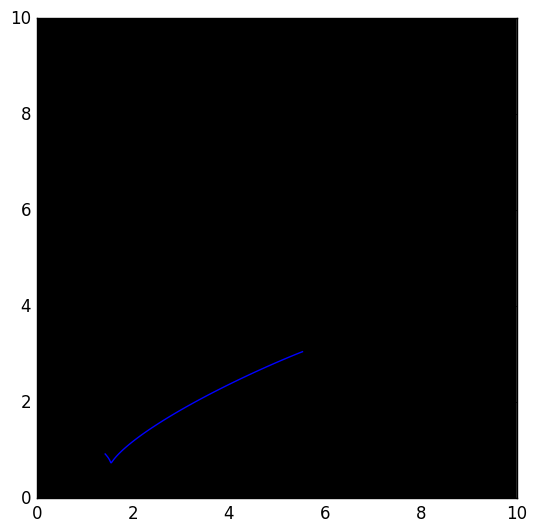

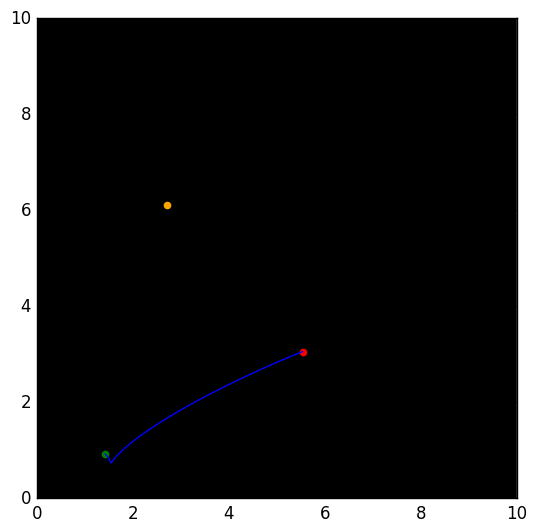

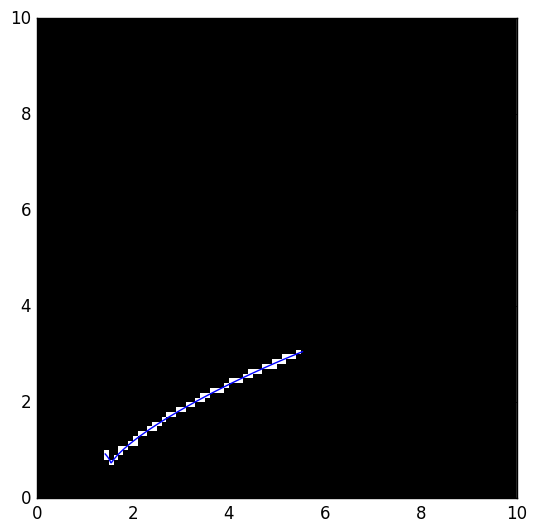

Optimization ended because went through all iterations
unverified
unverified
unverified
unverified
unverified
unverified
unverified
unverified
unverified
verified
Time of Path: 10.0


PyObject <matplotlib.image.AxesImage object at 0x000000004090D3C8>

In [330]:

#Function polyPathLocal creates a 7th order polynomial to be fit and optimized between the current copter configuration
# and a configuration on the global plan.
#Assumptions
# Default global path to plan to is Dijkstras
# Average distance for local planner is 10 meters
# Three initial conditions are known
#Inputs
# current_Pos - the initial positions x,y,z, yaw = p
# current_Vel - the initial velocities in x,y,z, yaw = p
# current_Accel - the initial accelerations in x,y,z, yaw = p
# final_Pos - the final positions in x,y,z, yaw = p
# final_Vel - te final velocities in x,y,z, yaw = p
# final_Accel - the final accelerations in x,y,z, yaw = p
# costmap - an array of values from 0-255 to designate cost of traveling in a certain square by obstacles
# q_coeffs - a vector of weights to be applied to the derivative costs
# obstacleWeight - the weight applied to the obstacles in the cost function
# flag - a boolean that will decide between dijkstras or FMT global planning assumption, true -> fmt
# perturbStep - the amount of distance to start the gradient descent
# iterations - number of iterations to optimize over
#Outputs
# polyPath - the coefficients of the polynomial of the planned path
#####################Testing Variables###########################################
#Create costmap
# Form a grid which shows the cells we check:
width = get_grid_extent();
res   = get_grid_resolution();
n = round(Int64,ceil(width/res));
#joog += 1
srand(joog)
println(joog)
#interesting seed:14, 15, 21
costmap = zeros(n,n,n)+50;
#Create a certain amount of objects
for tc = 1:20
    index1 = round(rand()*get_grid_extent()/get_grid_resolution());
    index2 = round(rand()*get_grid_extent()/get_grid_resolution());
    for l = 1:size(costmap,1)
        for p = 1:size(costmap,2)
            costmap[l,p,1] += 255/(sqrt((l-index1)^2+(p-index2)^2));
            if(costmap[l,p,1]>255)
                costmap[l,p,1] = 255;
            end
        end
    end
end
#Flip costmap for ploting purposes
costmap = zeros(n,n,n)
pcostmap = costmap[:,:,1];
temp_costmap = zeros(size(pcostmap,1),size(pcostmap,2))
for h =1:size(costmap,1)
    for g = 1:size(costmap,2)
        temp_costmap[h,g,1] = costmap[h,size(pcostmap,2)-g+1,1];
    end
end
temp_costmap=temp_costmap';

#Things for testing random start and end configurations: only change the first number
vel_lim = 0.0*2;
accel_lim = 0.65/4*2;
##########################
current_Pos = Point(rand()*(get_grid_extent()-5)+2,rand()*(get_grid_extent()-5)+2,0,0);
current_Vel = Point((rand()-0.5)*vel_lim,(rand()-0.5)*vel_lim,0,0);
current_Accel = Point(0,0,0,0);
final_Pos = Point(rand()*(get_grid_extent()-5)+2,rand()*(get_grid_extent()-5)+2,0,0);
final_Vel = Point((rand()-0.5)*vel_lim,(rand()-0.5)*vel_lim,0,0);
final_Accel = Point((rand()-0.5)*accel_lim,(rand()-0.5)*accel_lim,0,0);
flag = false;
q_coeff = zeros(6+flag);
#q_coeff[2] = 1;
q_coeff[1]=0;
q_coeff[2]=2;
q_coeff[3] = 0;

obstacleWeight = 10;
lowerQeffs = 100000;
iterations = 100;
perturbStep = 0.01;
perturbStep2 = 0.01;
precision = 0.000001;
dim = 2;
max_vel = 2.0;
max_accel = 0.65;
max_jerk = 100.0;
max_rpm = 100000000000.0;
timeStep  = 0.005;
aggressParam = 0.7;
timeIncrease = 1;
timeStart = 1.0;#sqrt((current_Pos.x-final_Pos.x)^2 + (current_Pos.y - final_Pos.y)^2)/max_vel;
#############################################################################################
#Changeable value
num_free = 2;
num_points = 2;

#Read in the states avaiable in the order initials, finals
if(flag)
    #All constraints
    x_constr = [current_Pos.x; current_Vel.x; current_Accel.x; final_Pos.x; final_Vel.x; final_Accel.x];
    y_constr = [current_Pos.y; current_Vel.y; current_Accel.y; final_Pos.y; final_Vel.y; final_Accel.y];
    z_constr = [current_Pos.z; current_Vel.z; current_Accel.z; final_Pos.z; final_Vel.z; final_Accel.z];
    p_constr = [current_Pos.p; current_Vel.p; current_Accel.p; final_Pos.p; final_Vel.p; final_Accel.p];
else
    #if dijkstras create a velocity approximation from the two points assuming traversed in a second - this gets relaxed
    #later in the verification step also note the lack of a final acceleration
    x_constr = [current_Pos.x; current_Vel.x; current_Accel.x; (final_Pos.x - current_Pos.x)];
    y_constr = [current_Pos.y; current_Vel.y; current_Accel.y;  (final_Pos.y - current_Pos.y)];
    z_constr = [current_Pos.z; current_Vel.z; current_Accel.z;  (final_Pos.z - current_Pos.z)];
    p_constr = [current_Pos.p; current_Vel.p; current_Accel.p;  (final_Pos.p - current_Pos.p)];
end
#Set up the constraint matrix in the order initials, finals (plus another constraint for optimization)
num_constr = length(x_constr)+num_free;
#The two corresponds to acceleration being the 2nd derivative three 
#if dijkstras create a free variable of acceleration else create another constraint for jerk
orders = [collect(0:2); collect(1:(2+flag));0];
#Create time vector assuming 1 second for the final conditions and zero for the initial conditions
#There are three zeros for three initial conditions
#The last value is flag to be a one when fmt is used otherwise it will be in the vector as a zero that is never used
times = [0.0;timeStart];
timeIndex = [0;0;0;1;1;1;flag];
#Calculate some numbers
tot_degree = num_constr;


#Set up A matrix so that Ap = d where p is the coefficients of the polynomial and d are the constraints in a vector
A = zeros(tot_degree, tot_degree);
for k=1:tot_degree
    A[k,:] = constr_order(orders[k], times[timeIndex[k]+1],tot_degree);
end
#Calculate A inverse
A_inv = inv(A);
Au = A_inv;
# Form Q matrix where cost = p'Qp without the costmap
Q = form_Q(q_coeff, times[end]-times[1]); 
#Solve for the optimal ends with no costmap first
R = A_inv'*(Q*A_inv);
#short for optimizing matrix
opt_mat = -( R[(tot_degree-num_free+1):tot_degree, (tot_degree-num_free+1):tot_degree])\R[1:(tot_degree-num_free), 
    (tot_degree-num_free+1):tot_degree]';
#Record the optimized value in a variable for later gradient descent; will only work for 1 free variable at the moment
x_free = opt_mat * (x_constr) #+ [0;final_Pos.x];
y_free = opt_mat * (y_constr) #+ [0;final_Pos.y];
z_free = opt_mat * (z_constr) #+ [0;final_Pos.z];

x_coeffs = A_inv * [x_constr; x_free];
y_coeffs = A_inv * [y_constr; y_free];
z_coeffs = A_inv * [z_constr; z_free];


#Plot the poly optimized only for derivative costs
figure()
plotTimes = linspace(0,times[end],100);
plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
#println([x_constr; x_free])
#println([y_constr; y_free])
#println(opt_mat * x_constr)
#Check the cost with the costmap by first finding the squares the path goes through
#Find the cells of that the polynomial passes through; the last 5 inputs here are the three grid resolutions,
# the dimension and an aggression param
cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, timeIndex, get_grid_resolution(), 
    get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
#Check if out of bounds and avoid loop
if(holder)
    println("path went out of bounds")
    unOptimized = false;
else
    unOptimized = true;
end
#The division by three is to normalize the costs from the coefficients#
#println(cells)
cost1 = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
    obstacleWeight*sum(costmap[cells]);
#Optimize for cost using gradient descent
counter = 0;
#Start the while loop until optimized or over the number of times to iterate
while(unOptimized && counter <= iterations)
    #println("in cost loop")
    #Perturb every dimension and solve for the new polynomials
    delta = perturbStep;
    #Check the cost of each perturbed poly, if increased, change the perturbation direction, record the rate of change
    x_coeffsP = A_inv * [x_constr; x_free+[perturbStep; 0]];
    cells,holder = occupancyCellChecker(x_coeffsP, y_coeffs, z_coeffs, times, get_grid_resolution(),
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costx = (x_coeffsP' * Q * x_coeffsP + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangex = (costx-cost1)/perturbStep;
    y_coeffsP = A_inv * [y_constr; y_free+[perturbStep; 0]];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffsP, z_coeffs, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costy = (x_coeffs' * Q * x_coeffs + y_coeffsP' * Q * y_coeffsP + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangey = (costy-cost1)/perturbStep;
    z_coeffsP = A_inv * [z_constr; z_free+[perturbStep; 0]];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffsP, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costz = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffsP' * Q * z_coeffsP)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangez = (costz-cost1)/perturbStep;
    #Check the cost of each perturbed poly, in other dimension
    x_coeffsP = A_inv * [x_constr; x_free+[0; perturbStep2]];
    cells,holder = occupancyCellChecker(x_coeffsP, y_coeffs, z_coeffs, times, get_grid_resolution(),
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costx = (x_coeffsP' * Q * x_coeffsP + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangex2 = (costx-cost1)/perturbStep2;
    y_coeffsP = A_inv * [y_constr; y_free+[0; perturbStep2]];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffsP, z_coeffs, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costy = (x_coeffs' * Q * x_coeffs + y_coeffsP' * Q * y_coeffsP + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangey2 = (costy-cost1)/perturbStep2;
    z_coeffsP = A_inv * [z_constr; z_free+[0; perturbStep2]];
    cells, holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffsP, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    costz = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffsP' * Q * z_coeffsP)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    rateChangez2 = (costz-cost1)/perturbStep2;

    #Calculate the vector direction of maximum descent

    dir = normalize!([rateChangex[1]*(-sign(rateChangex)[1]); rateChangey[1]*(-sign(rateChangey)[1]); 
        rateChangez[1]*(-sign(rateChangez)[1]);rateChangex2[1]*(-sign(rateChangex2)[1]);
        rateChangey2[1]*(-sign(rateChangey2)[1]);rateChangez2[1]*(-sign(rateChangez2)[1])]);

    #Step in that direction for all variables
    x_free += [perturbStep * -sign(rateChangex)[1]*abs(dir[1]);perturbStep2 * -sign(rateChangex2)[1]*abs(dir[4])];
    y_free += [perturbStep * -sign(rateChangey)[1]*abs(dir[2]);perturbStep2 * -sign(rateChangey2)[1]*abs(dir[5])];
    z_free += [perturbStep * -sign(rateChangex)[1]*abs(dir[3]);perturbStep2 * -sign(rateChangez2)[1]*abs(dir[6])];

    #Calculate poly and cost and see if actually decreased
    x_coeffs = A_inv * [x_constr; x_free];
    y_coeffs = A_inv * [y_constr; y_free];
    z_coeffs = A_inv * [z_constr; z_free];
    cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
        get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    #Check if out of bounds and break out since without accurate costs things would get messed up
    if(holder)
        println("path went out of bounds")
        break;
    end
    #The division by three is to normalize the costs from the coefficients
    costNew = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
        obstacleWeight*sum(costmap[cells]);
    #If not decreased half the step and recompute
    if((cost1-costNew)[1] < 0)
        #println("shortened step")
        perturbStep = perturbStep/2;
        perturbStep2=perturbStep2/2;
        x_free -= [perturbStep * -sign(rateChangex)[1]*abs(dir[1]);perturbStep2 * -sign(rateChangex2)[1]*abs(dir[4])];
        y_free -= [perturbStep * -sign(rateChangey)[1]*abs(dir[2]);perturbStep2 * -sign(rateChangey2)[1]*abs(dir[5])];
        z_free -= [perturbStep * -sign(rateChangex)[1]*abs(dir[3]);perturbStep2 * -sign(rateChangez2)[1]*abs(dir[6])];
    end
    #Check if within small change
    if(abs(perturbStep * dir[1]) < precision && abs(perturbStep * dir[2]) < precision && 
        abs(perturbStep * dir[3]) < precision && abs(perturbStep2 * dir[4]) < precision && 
        abs(perturbStep2 * dir[5]) < precision && abs(perturbStep2 * dir[6]) < precision)
        unOptimized = false;
        println("Made it through optimization according to percision")
    end
    counter += 1;
    #println("counter: ", counter, "  iterations: ", iterations)
    #update cost
    cost1 = costNew;
    #println(cost1)
end
#end while

if(counter>iterations)
    println("Optimization ended because went through all iterations")
end
#println((x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs )
#println(obstacleWeight*sum(costmap[cells]))

#Plot the optimized polyseg
#figure()
#plotTimes = linspace(0,times[end],100);
#plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
#imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
#Color the cells of the poly
#Check if collided by checking last cost bit
#println(costmap[cells])
#Start repeat if not verified
unverified = true;
counter2 = 0;
timeV = times[end];
sol = PolySol(num_points-1, times, x_coeffs, y_coeffs, z_coeffs, p_coeffs); 
while(unverified && !holder)
    #verfiy path is feasible based on constraints    
    errorTimes = verifyActuateablePath(sol, max_vel*timeV, max_accel*timeV^2, max_jerk*timeV^3, max_rpm, dim, 6+flag);
    #println(errorTimes)
    #Redo the calculation with a larger time if there are errors
    if(!isempty(errorTimes) && counter2 < 100)
        #Start a while loop to loop until the path is optimized
        println("unverified")
        unverified = true;
        counter2 += timeIncrease;
        timeV += timeIncrease;
    else
        if(counter2 >= 100)
            println("not verified in less than 100s")
        else
            println("verified")
            println("Time of Path: ", timeV)
        end
        unverified = false;
        #Find the cells of that the polynomial passes through
        #cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
        #get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
    end
end
#Check if path is too long compared to distance to travel
#if(10< length(cells)*get_grid_resolution())
    #(sqrt((current_Pos.x-final_Pos.x)^2+(current_Pos.y-final_Pos.y)^2
    #Print a stupid message
#    println("stupid path so should stop")
#end
#Check if not out of bounds and make cost inf if it is true
if(!holder)
    #Check Collision again
    restartCount = 0
    while(any(costmap[cells].>254) && restartCount < 10)
        #return failure if collided still
        println("Leads to a collision so failure and random restart start")
        #Random restart
        #Record the optimized value in a variable for later gradient descent; will only work for 1 free variable at the moment
        x_free = (rand()-0.5)*200;
        y_free = (rand()-0.5)*200;
        z_free = (rand()-0.5)*200;
        x_coeffs = A_inv * [x_constr; x_free];
        y_coeffs = A_inv * [y_constr; y_free];
        z_coeffs = A_inv * [z_constr; z_free];

        #Plot the poly optimized only for derivative costs
        figure()
        plotTimes = linspace(0,times[end],100);
        plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
        imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
        #println([x_constr; x_free])
        #println([y_constr; y_free])
        #println(opt_mat * x_constr)
        #Check the cost with the costmap by first finding the squares the path goes through
        #Find the cells of that the polynomial passes through; the last 5 inputs here are the three grid resolutions,
        # the dimension and an aggression param
        cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, timeIndex, get_grid_resolution(), 
            get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
        #Check if out of bounds and avoid loop
        if(holder)
            println("path went out of bounds")
            unOptimized = false;
        else
            unOptimized = true;
        end
        #The division by three is to normalize the costs from the coefficients#
        #println(cells)
        cost1 = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
            obstacleWeight*sum(costmap[cells]);
        #Optimize for cost using gradient descent
        counter = 0;
        #Start the while loop until optimized or over the number of times to iterate
        while(unOptimized && counter <= iterations)
            #println("in cost loop")
            #Perturb every dimension and solve for the new polynomials
            delta = perturbStep;
            #Check the cost of each perturbed poly, if increased, change the perturbation direction, record the rate of change
            x_coeffsP = A_inv * [x_constr; x_free+perturbStep];
            cells,holder = occupancyCellChecker(x_coeffsP, y_coeffs, z_coeffs, times, get_grid_resolution(),
                get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
            #Check if out of bounds and break out since without accurate costs things would get messed up
            if(holder)
                println("path went out of bounds")
                break;
            end
            costx = (x_coeffsP' * Q * x_coeffsP + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
                obstacleWeight*sum(costmap[cells]);
            rateChangex = (costx-cost1)/perturbStep;
            y_coeffsP = A_inv * [y_constr; y_free+perturbStep];
            cells, holder = occupancyCellChecker(x_coeffs, y_coeffsP, z_coeffs, times, get_grid_resolution(), 
                get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
            #Check if out of bounds and break out since without accurate costs things would get messed up
            if(holder)
                println("path went out of bounds")
                break;
            end
            costy = (x_coeffs' * Q * x_coeffs + y_coeffsP' * Q * y_coeffsP + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
                obstacleWeight*sum(costmap[cells]);
            rateChangey = (costy-cost1)/perturbStep;
            z_coeffsP = A_inv * [z_constr; z_free+perturbStep];
            cells, holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffsP, times, get_grid_resolution(), 
                get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
            #Check if out of bounds and break out since without accurate costs things would get messed up
            if(holder)
                println("path went out of bounds")
                break;
            end
            costz = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffsP' * Q * z_coeffsP)/3/lowerQeffs +
                obstacleWeight*sum(costmap[cells]);
            rateChangez = (costz-cost1)/perturbStep;

            #Calculate the vector direction of maximum descent
            dir = normalize!([rateChangex[1]*(-sign(rateChangex)[1]); rateChangey[1]*(-sign(rateChangey)[1]); rateChangez[1]*(-sign(rateChangez)[1])]);

            #Step in that direction for all variables
            x_free += perturbStep * -sign(rateChangex)[1]*abs(dir[1]);
            y_free += perturbStep * -sign(rateChangey)[1]*abs(dir[2]);
            z_free += perturbStep * -sign(rateChangex)[1]*abs(dir[3]);

            #Calculate poly and cost and see if actually decreased
            x_coeffs = A_inv * [x_constr; x_free];
            y_coeffs = A_inv * [y_constr; y_free];
            z_coeffs = A_inv * [z_constr; z_free];
            cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
                get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
            #Check if out of bounds and break out since without accurate costs things would get messed up
            if(holder)
                println("path went out of bounds")
                break;
            end
            #The division by three is to normalize the costs from the coefficients
            costNew = (x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs +
                obstacleWeight*sum(costmap[cells]);
            #If not decreased half the step and recompute
            if((cost1-costNew)[1] < 0)
                #println("shortened step")
                perturbStep = perturbStep/2;
                x_free -= perturbStep * -sign(rateChangex)[1]*abs(dir[1]);
                y_free -= perturbStep * -sign(rateChangey)[1]*abs(dir[2]);
                z_free -= perturbStep * -sign(rateChangex)[1]*abs(dir[3]);
            end
            #Check if within small change
            if(abs(perturbStep * dir[1]) < precision && abs(perturbStep * dir[2]) < precision && abs(perturbStep * dir[3]) < precision)
                unOptimized = false;
                println("Made it through optimization according to percision")
            end
            counter += 1;
            #println("counter: ", counter, "  iterations: ", iterations)
            #update cost
            cost1 = costNew;
            #println(cost1)
        end
        #end while

        if(counter>iterations)
            println("Optimization ended because went through all iterations")
        end
        #println((x_coeffs' * Q * x_coeffs + y_coeffs' * Q * y_coeffs + z_coeffs' * Q * z_coeffs)/3/lowerQeffs )
        #println(obstacleWeight*sum(costmap[cells]))

        #Plot the optimized polyseg
        #figure()
        #plotTimes = linspace(0,times[end],100);
        #plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
        #imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
        #Color the cells of the poly
        #Check if collided by checking last cost bit
        #println(costmap[cells])
        #Start repeat if not verified
        unverified = true;
        counter2 = 0;
        timeV = times[end];
        sol = PolySol(num_points-1, times, x_coeffs, y_coeffs, z_coeffs, p_coeffs); 
        while(unverified && !holder)
            #verfiy path is feasible based on constraints    
            errorTimes = verifyActuateablePath(sol, max_vel*timeV, max_accel*timeV^2, max_jerk*timeV^3, max_rpm, dim, 6+flag);
            #println(errorTimes)
            #Redo the calculation with a larger time if there are errors
            if(!isempty(errorTimes) && counter2 < 100)
                #Start a while loop to loop until the path is optimized
                println("unverified")
                unverified = true;
                counter2 += timeIncrease;
                timeV += timeIncrease;
            else
                if(counter2 >= 100)
                    println("not verified in less than 100s")
                else
                    println("verified")
                    println("Time of Path: ", timeV)
                end
                unverified = false;
                #Find the cells of that the polynomial passes through
                #cells,holder = occupancyCellChecker(x_coeffs, y_coeffs, z_coeffs, times, get_grid_resolution(), 
                #get_grid_resolution(), get_grid_resolution(), dim, aggressParam,timeStep);
            end
        end
        restartCount += 1;
    end
    #check if collision
    if(holder)
        println("Leads to a collision so failure") 
    end
    #Create path
    
    figure()
    plotTimes = linspace(0,times[end],100);
    plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
    scatter(current_Pos.x,current_Pos.y,color = "red")
    scatter(final_Pos.x,final_Pos.y, color = "orange")
    scatter(evaluate_poly(x_coeffs,0,1), evaluate_poly(y_coeffs,0,1),color= "green")
    imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
    
    #Plot occupancy grid
    for d in cells
        costmap[d]=255;
         #Flip costmap for ploting purposes
        pcostmap = costmap[:,:,1];
        temp_costmap = zeros(size(pcostmap,1),size(pcostmap,2))
        for h =1:size(costmap,1)
            for g = 1:size(costmap,2)
                temp_costmap[h,g,1] = costmap[h,size(pcostmap,2)-g+1,1];
            end
        end
        temp_costmap=temp_costmap';
    end
            figure()
    plotTimes = linspace(0,times[end],100);
    plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
    imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])
end

#Return path

#


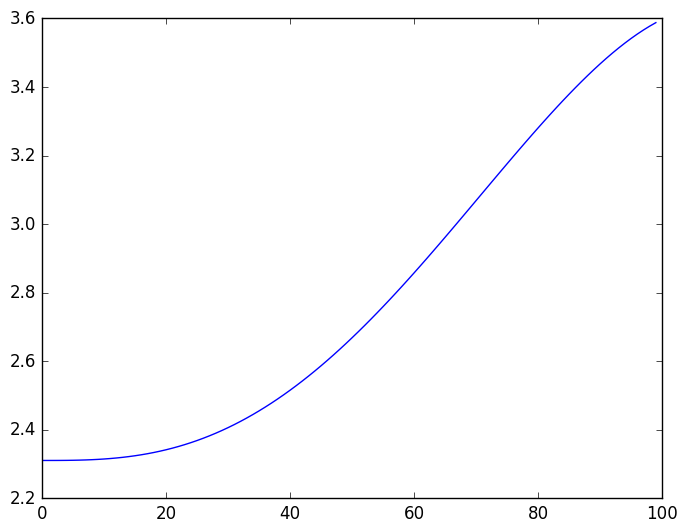

121.58800553385495
Point(2.3107800242521397,4.325565846194576,0.0,0.0)
[-8.74129,3.58777]
[-16.7956,6.67421]
Point(3.2878596293580458,6.117346968983698,0.0,0.0)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FD229E8>

In [313]:
println(costmap[1,1,1])
println(current_Pos)
println(x_free)
println(y_free)
println(final_Pos)
plot(evaluate_poly(x_coeffs,0,plotTimes))

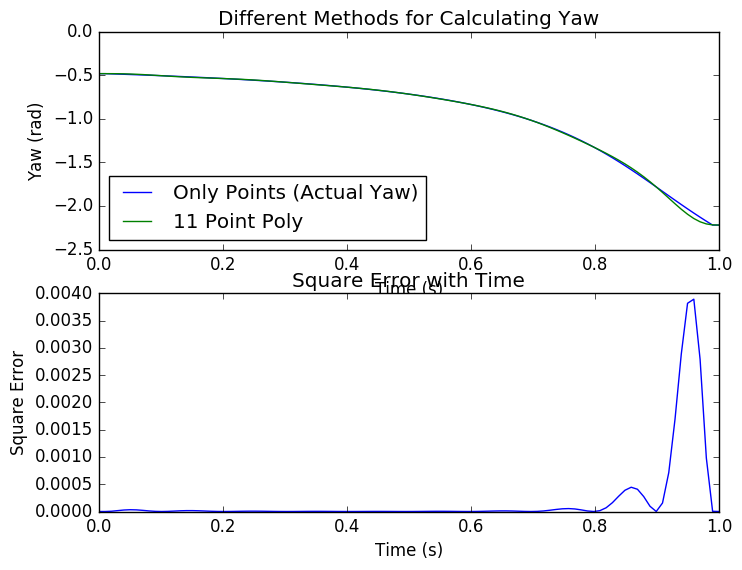

0.0
0


PyObject <matplotlib.text.Text object at 0x00000002A43A2550>

In [1091]:
#Given the coefficients from an optimized polynomial from the previous cell
# try 3 different methods to determine the yaw polynomial

#Set some values for easy changing
n = 11; #number of points
timeRes = 100; # just keep at 100 for now there is a bug at the moment
plotTimes = collect(linspace(times[1],times[end],timeRes));
#Method 2 calculate the yaw points at every step
#Calculate the velocity at the times
xvpoints = evaluate_poly(x_coeffs, 1, plotTimes);
yvpoints = evaluate_poly(y_coeffs, 1, plotTimes);
#Calculate the yaw points
yawPoints = 0;
yawPoints = -atan2(yvpoints, xvpoints);
yawPoints = yawPoints - yawPoints[1];
factor = 0;
#Make the yaw points continuous in time
agf= zeros(size(yawPoints,1),size(yawPoints,2)) #Why agf? because I was upset when I got this working
for d = 1:length(yawPoints)-1
    agf[d] = yawPoints[d] + factor*2*pi;
    #Debug outputs
    #println(agf[d])
    #println(plotTimes[d], " ", yawPoints[d], " ", yawPoints[d+1])
    #When there is a large jump in value get ready to add two pi
    if(abs(yawPoints[d]-yawPoints[d+1])>2)
        #println("here")
        #Add/subtract 2 pi based on the change in angle
        factor +=1*sign(yawPoints[d]-yawPoints[d+1]);
    end
end
#Change the last value
agf[end] = yawPoints[end] + factor*2*pi;
#########################This portion is only necessary when the velocities are zero
#At the moment it is unclear whether the or is needed
if(xvpoints[1] == 0.0 || yvpoints[1] == 0.0 || xvpoints[end] == 0.0 || yvpoints[end] == 0.0)
    #The first and final points will be bad so just make the what the will be or was
    agf[1] = agf[2]; 
    agf[end] = agf[end-1];
end
#println(yawPoints)
############################################################################
#Plot first method on the same graph
subplot(2,1,1)
plot(plotTimes, agf)

#Method 1: Choose n equally spaced points an solve for the desired yaw; then fit an n-1 degree polynomial to the points
#Get the velocity at those points,
timePoints = plotTimes[round(Int64,collect(linspace(1,100,n)))];
ordersYaw = zeros(size(timePoints,1), size(timePoints,2));
#Add the beginning and end again
timePoints = [timePoints; times[1];  times[1]; times[end]; times[end]]
ordersYaw = [ordersYaw; 1;2; 1;2]
#Calculate the yaw points; add a negative since our courdinate frame is NED
yawPoints = agf[round(Int64,collect(linspace(1,100,n)))];
#Add end constraints so calculate all the necessary derivatives
ydI = evaluate_poly(y_coeffs, 1, times[1])
yddI = evaluate_poly(y_coeffs, 2, times[1])
xdI = evaluate_poly(x_coeffs, 1, times[1])
xddI = evaluate_poly(x_coeffs, 2, times[1])
xdddI = evaluate_poly(x_coeffs, 3, times[1])
ydddI = evaluate_poly(y_coeffs, 3, times[1])
xdF = evaluate_poly(x_coeffs, 1, times[end])
xddF = evaluate_poly(x_coeffs, 2, times[end])
yddF = evaluate_poly(y_coeffs, 2, times[end])
ydF = evaluate_poly(y_coeffs, 1, times[end])
xdddF = evaluate_poly(x_coeffs, 3, times[end])
ydddF = evaluate_poly(y_coeffs, 3, times[end])
yawInit = agf[1];
yawFin = agf[end];#-atan2(ydF, xdF);
if(xvpoints[1] == 0.0 || yvpoints[1] == 0.0 || xvpoints[end] == 0.0 || yvpoints[end] == 0.0)
    yawDInit = 0;#-(1/(1+ydI/xdI))*(yddI*xdI-ydI*xddI)/xdI^2;
    yawDFin = 0;#-(1/(1+ydF/xdF))*(yddF*xdF-ydF*xddF)/xdF^2;
    yawDDInit = 0;#((xdI+ydI)*(ydddI*xdI-ydI*xdddI)-(yddI*xdI-ydI*xddI)*(xddI+yddI))/(xdI+ydI)^2;
    yawDDFin = 0;#((xdF+ydF)*(ydddF*xdF-ydF*xdddF)-(yddF*xdF-ydF*xddF)*(xddF+yddF))/(xdF+ydF)^2;
else
    yawDInit = -(1/(1+ydI/xdI))*(yddI*xdI-ydI*xddI)/xdI^2;
    yawDFin = -(1/(1+ydF/xdF))*(yddF*xdF-ydF*xddF)/xdF^2;
    yawDDInit = ((xdI+ydI)*(ydddI*xdI-ydI*xdddI)-(yddI*xdI-ydI*xddI)*(xddI+yddI))/(xdI+ydI)^2;
    yawDDFin = ((xdF+ydF)*(ydddF*xdF-ydF*xdddF)-(yddF*xdF-ydF*xddF)*(xddF+yddF))/(xdF+ydF)^2;
end
yawPoints = [yawPoints; yawDInit; yawDDInit; yawDFin; yawDDFin];
#Construct and A matrix
#The four was needed for the added end constraints
Ayaw = zeros(n+4, n+4);
for k=1:n+4
    Ayaw[k,:] = constr_order(ordersYaw[k], timePoints[k],n+4);
    #println(Ayaw[k,:])
end

AyawInv = inv(Ayaw);
#Solve for p
yawCoeffs = AyawInv*yawPoints;
#Plot the result

plot(plotTimes, evaluate_poly(yawCoeffs, 0, plotTimes))
println(evaluate_poly(yawCoeffs, 1, 0))
println(yawDInit)




#Method 3 is obsolete since it doesn't work, mostly because of the low order I think
#Method 3: create constraints on the ends for the yaw polynomial from x and y and fit a polynomial to it
#Calculate constraints
ydI = evaluate_poly(y_coeffs, 1, times[1])
yddI = evaluate_poly(y_coeffs, 2, times[1])
xdI = evaluate_poly(x_coeffs, 1, times[1])
xddI = evaluate_poly(x_coeffs, 2, times[1])
xdF = evaluate_poly(x_coeffs, 1, times[end])
xddF = evaluate_poly(x_coeffs, 2, times[end])
yddF = evaluate_poly(y_coeffs, 2, times[end])
ydF = evaluate_poly(y_coeffs, 1, times[end])
yawInit = agf[1];
yawDInit = -(1/(1+ydI/xdI))*(yddI*xdI-ydI*xddI)/xdI^2;
yawFin = agf[end];#-atan2(ydF, xdF);
yawDFin = -(1/(1+ydF/xdF))*(yddF*xdF-ydF*xddF)/xdF^2;
#create an orders vector and times vector
constraintYaw = [yawInit, yawDInit, yawFin, yawDFin];
ordersYaw = [0,1,0,1];
timeYaws = [0,0,1,1];
r = length(timeYaws)
#Construct and A matrix
Ayaw = zeros(r, r);
for k=1:r
    Ayaw[k,:] = constr_order(ordersYaw[k], timeYaws[k],r);
end
AyawInv = inv(Ayaw);
#Solve for p
#yawCoeffs = AyawInv*constraintYaw;
#plot(plotTimes, evaluate_poly(yawCoeffs, 0, plotTimes))

#Method 4 let it be part of the complete optimization
#plot(plotTimes, evaluate_poly(p_coeffs, 0, plotTimes))
#Create a legend must be updated if other methods are plotted again
legend(["Only Points (Actual Yaw)","$n Point Poly"], loc="best")
#Create labels
title("Different Methods for Calculating Yaw")
xlabel("Time (s)")
ylabel("Yaw (rad)")

#Create error plot in subplot
subplot(2,1,2)
errorStuff = (agf - evaluate_poly(yawCoeffs, 0, plotTimes)).^2;
plot(plotTimes, errorStuff)
title("Square Error with Time")
xlabel("Time (s)")
ylabel("Square Error")

In [1016]:
println(agf[end])

-4.419444546583476


7.0
linspace(0.0,1.0,100)


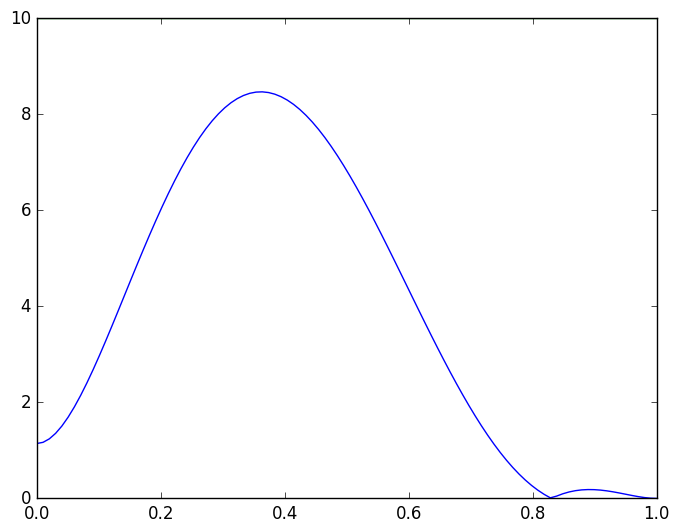

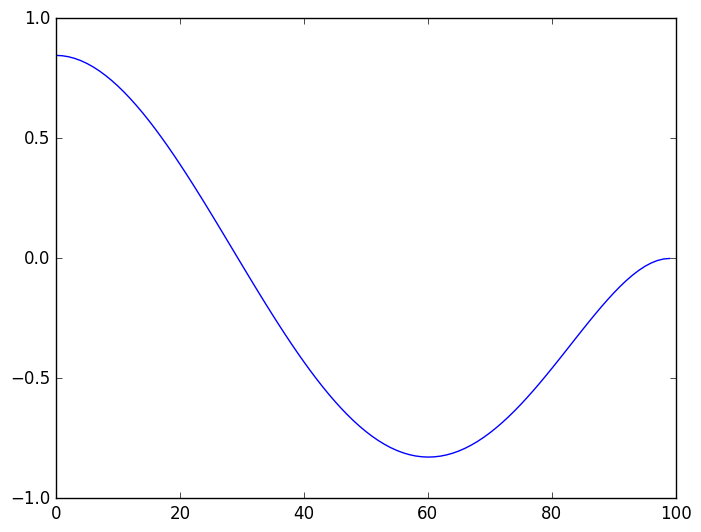

[10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0; 10.0]


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006CEC2D30>

In [837]:
#create lines
println(timeV)
println(plotTimes)
num = 1;
limit = ones(size(plotTimes,1), size(plotTimes,2)) * max_vel*(timeV-2)^num;
plot(plotTimes, sqrt((evaluate_poly(y_coeffs,num,plotTimes)).^2+(evaluate_poly(y_coeffs,num,plotTimes)).^2));
plot(plotTimes, limit)
println(limit)
figure()
plot(evaluate_poly(x_coeffs,1,plotTimes))

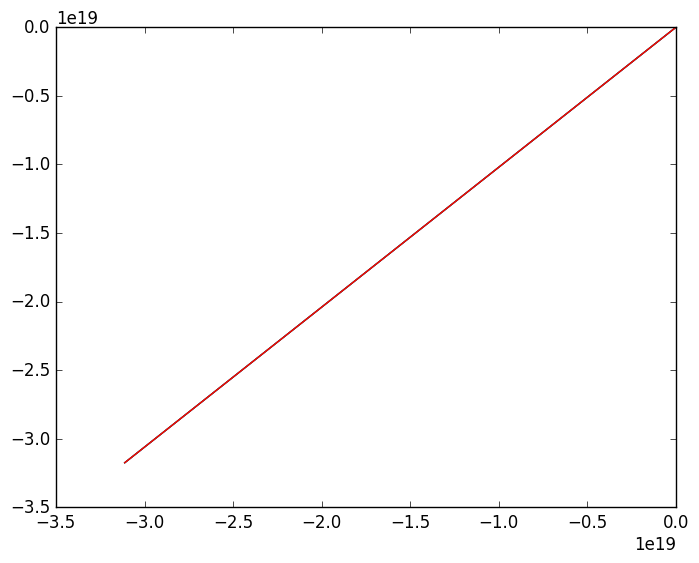

[3.44908,0.259226,0.0,2.79099,0.0,0.0]


In [757]:
for q = -1:1
    xcoeffs = Au*[10.2;1;0;20;0;0;187];
    ycoeffs = Au*[12.3;1.0;0;22.3;0;0;230+q];
    plotTimes = linspace(0,1,100);
    plot(evaluate_poly(xcoeffs,0,plotTimes),evaluate_poly(ycoeffs,0,plotTimes) );
end
println(y_constr)
#[10.2,1.0,0.0,20.0,9.8,-11.7333]
#[10.3,1.0,0.0,22.3,12.0,-14.6667]

In [85]:
println(x_coeffs)

[1.0,1.0,-2.03931e-16,-0.0107305,0.000172624,-6.6314e-7]


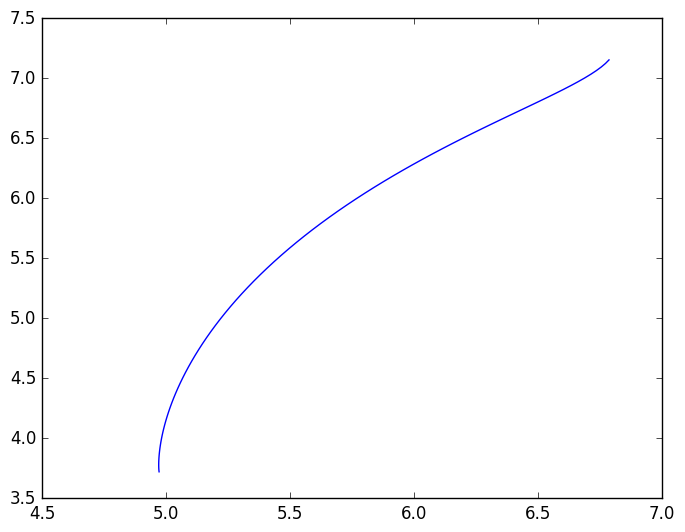

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003184BAC8>

In [279]:
    plot(evaluate_poly(x_coeffs,0,plotTimes), evaluate_poly(y_coeffs,0,plotTimes));
    #imshow(temp_costmap,cmap="gray", interpolation="none",extent=[0,width,0,width])

#println(costmap[cells])

In [324]:
#2d Linear interpolation give a path, a step size, end time,and costmap grid
#Initilize time to zero
ctime = 0;
N = round(Int64, ceil(get_grid_extent()/get_grid_resolution()));
#first get the nearest cell
nearCell = ind2sub((N,N,N),occupancy_get_id(evaluate_poly(x_coeffs, 0, 0),evaluate_poly(y_coeffs, 0, 0),evaluate_poly(z_coeffs, 0, 0)));
#first find the current point in 2d
x1 = evaluate_poly(x_coeffs, 0, 0);
y1 = evaluate_poly(y_coeffs, 0, 0);
#Find the indeces
x1ind = round(Int64, x1/get_grid_resolution());
x2ind = x1ind+1;
y1ind = round(Int64, y1/get_grid_resolution());
y2ind = y1ind+1;
#Then find the actual x values of the grids on the cost map
x1 = x1ind * get_grid_resolution();
y1 = y2ind * get_grid_resolution();
x2 = x2ind * get_grid_resolution();
y2 = y2ind * get_grid_resolution();
#calculate interpolated cost function about that cell order if f_ij = f(x_i, y_j)
f_11 = costmap[nearCell];
f_12 = costmap[nearCell+[0;1;0]];
f_21 = costmap[nearCell+[1;0;0]];
f_22 = costmap[nearCell+[1;1;0]];
f = [f_11;f_12;f_21;f_22];
#Create the solving matrix
B = [1 nearCell[1] nearCell[2] nearCell[1]*nearCell[2];
    1 nearCell[1] nearCell[2]+1 nearCell[1]*(nearCell[2]+1);
    1 nearCell[1]+1 nearCell[2] (nearCell[1]+1)*nearCell[2];
    1 nearCell[1]+1 nearCell[2]+1 (nearCell[1]+1)*(nearCell[2]+1)];
#calculate cost at that point
#sum
#step along the path
#while path is not at its end
#check if nearest cell is the same
#if so use old cost function
#If not create new cost function
#Calculate the cost at the point
#sum
#step along path
#end while
#get the cost of the last point
#sum
#return total cost

LoadError: LoadError: indexing Array{Float64,3} with types Tuple{Tuple{Int64,Int64,Int64}} is not supported
while loading In[324], in expression starting on line 8